# Contents
#### 1. Importing data and libraries
#### 2. Wrangle prison population and U.S. Geopandas location dataset
#### 3. Merge prison data into location data
#### 4. Create map
     Using Geoplot
     Using matplotlib

## 1. Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import plotly.express as px
import geopandas as gpd
import geoplot as gplt

In [4]:
# This command prompts matplotlib visuals to appear in the notebook.

%matplotlib inline

In [5]:
path = r'C:\Documents\Career Foundry\Immersion Final'

In [6]:
pd.options.display.max_columns = None

In [7]:
pd.options.display.max_rows = None

In [45]:
# Import data file with prison population

df = pd.read_csv(os.path.join(path, 'Prison Comparisons', '02 Data', 'Prepped Data', 'carc15.csv'), index_col = 0)

In [10]:
# Import ".shp" file for the U.S. shape outline using Geopandas

dpu = gpd.read_file(os.path.join(path, '6.3', 'nwsmap', 's_11au16.shp'))

## 2. Wrangle prison population and U.S. Geopandas location dataset

In [11]:
df.head()

,year,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,aapi_pop_15to64,black_pop_15to64,latinx_pop_15to64,native_pop_15to64,white_pop_15to64,urbanicity,region,division
0,1970,AL,Autauga County,24661,14154,7293,6861,NaN,NaN,NaN,NaN,NaN,small/mid,South,East South Central
1,1971,AL,Autauga County,25503,14765,7585,7180,NaN,NaN,NaN,NaN,NaN,small/mid,South,East South Central
2,1972,AL,Autauga County,27156,15939,8168,7771,NaN,NaN,NaN,NaN,NaN,small/mid,South,East South Central
3,1973,AL,Autauga County,28453,16906,8651,8255,NaN,NaN,NaN,NaN,NaN,small/mid,South,East South Central
4,1974,AL,Autauga County,29261,17578,8992,8586,NaN,NaN,NaN,NaN,NaN,small/mid,South,East South Central


groupby year,state - avg total_pop

In [49]:
grouped_multiple = df.groupby(['year', 'state']).agg({'total_pop': ['mean']})

In [50]:
grouped_multiple = grouped_multiple.reset_index()

In [51]:
grouped_multiple.head()

,year,state,total_pop
,,,mean
0,1970,AK,8503.900000
1,1970,AL,51560.552239
2,1970,AR,25770.880000
3,1970,AZ,119968.733333
4,1970,CA,345617.344828


In [52]:
grouped_multiple.columns = ['year', 'state', 'total_pop_mean']

In [54]:
grouped_multiple.head()

,year,state,total_pop_mean
0,1970,AK,8503.900000
1,1970,AL,51560.552239
2,1970,AR,25770.880000
3,1970,AZ,119968.733333
4,1970,CA,345617.344828


groupby state, avg total_pop

In [64]:
dfg = grouped_multiple.groupby(['state']).agg({'total_pop_mean': ['mean']})

In [65]:
dfg.head()

,total_pop_mean
,mean
state,
AK,18282.874830
AL,63420.853792
AR,33717.431565
AZ,293403.655782
CA,526978.102393


In [66]:
dfg = dfg.reset_index()

In [67]:
dfg.head()

,state,total_pop_mean
,,mean
0,AK,18282.874830
1,AL,63420.853792
2,AR,33717.431565
3,AZ,293403.655782
4,CA,526978.102393


In [68]:
dfg.columns = ['state', 'total_pop_mean']

In [69]:
dfg.shape

(51, 2)

In [70]:
dfg.head()

,state,total_pop_mean
0,AK,18282.874830
1,AL,63420.853792
2,AR,33717.431565
3,AZ,293403.655782
4,CA,526978.102393


In [71]:
# View the head of the new Geodataframe.

dpu.head()

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."


In [73]:
#rename State column so can merge on it

dpu.rename(columns = {"STATE": "state"}, inplace=True)

In [74]:
dpu.head()

,state,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."


## 3. Merge prison data into location data

In [77]:
# Merge data df into GeoDataFrame

dfm = dpu.merge(dfg, on = 'state', how = 'outer', indicator = True)

In [78]:
dfm.shape

(57, 8)

In [79]:
dfm['_merge'].value_counts(dropna = False)

both          52
left_only      5
right_only     0
Name: _merge, dtype: int64

In [84]:
dfm[dfm['_merge'] == 'left_only']

,state,NAME,FIPS,LON,LAT,geometry,total_pop_mean,_merge
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773...",NaN,left_only
38,PR,Puerto Rico,72,-66.46912,18.22240,"MULTIPOLYGON (((-66.53116 17.88319, -66.53118 ...",NaN,left_only
45,VI,Virgin Islands,78,-64.80128,17.96397,"MULTIPOLYGON (((-64.76180 17.68474, -64.76116 ...",NaN,left_only
53,GU,Guam,66,145.15796,14.57384,"MULTIPOLYGON (((144.67462 13.23862, 144.67376 ...",NaN,left_only
54,MP,Northern Marianas,69,145.15796,14.57384,"MULTIPOLYGON (((145.13115 14.13565, 145.13118 ...",NaN,left_only


In [85]:
dfm.isnull().sum()

state             0
NAME              0
FIPS              0
LON               0
LAT               0
geometry          0
total_pop_mean    5
_merge            0
dtype: int64

In [86]:
dfm1 = dfm[dfm['total_pop_mean'].isnull() == False]

In [87]:
dfm1.isnull().sum()

state             0
NAME              0
FIPS              0
LON               0
LAT               0
geometry          0
total_pop_mean    0
_merge            0
dtype: int64

In [88]:
dfm1['_merge'].value_counts()

both          52
left_only      0
right_only     0
Name: _merge, dtype: int64

In [89]:
dfm1

,state,NAME,FIPS,LON,LAT,geometry,total_pop_mean,_merge
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",18282.874830,both
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",63420.853792,both
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",33717.431565,both
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",293403.655782,both
5,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",526978.102393,both
6,CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0...",60361.417411,both
7,CT,Connecticut,09,-72.72623,41.62196,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ...",416352.035714,both
8,DC,District of Columbia,11,-77.01464,38.90932,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ...",632124.816327,both
9,DE,Delaware,10,-75.50592,38.99559,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ...",245142.292517,both
10,FL,Florida,12,-82.50934,28.67402,"MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ...",211303.390496,both


In [92]:
# delete extra Maryland row

dfm2 = dfm1.loc[dfm1['LON'] != 0.00000]

In [93]:
dfm2

,state,NAME,FIPS,LON,LAT,geometry,total_pop_mean,_merge
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",18282.874830,both
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",63420.853792,both
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",33717.431565,both
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",293403.655782,both
5,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",526978.102393,both
6,CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0...",60361.417411,both
7,CT,Connecticut,09,-72.72623,41.62196,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ...",416352.035714,both
8,DC,District of Columbia,11,-77.01464,38.90932,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ...",632124.816327,both
9,DE,Delaware,10,-75.50592,38.99559,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ...",245142.292517,both
10,FL,Florida,12,-82.50934,28.67402,"MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ...",211303.390496,both


In [97]:
# Get rid of merge indicator row

dfm3 = dfm2.drop(['_merge'], axis = 1)

In [100]:
dfm3.head()

,state,NAME,FIPS,LON,LAT,geometry,total_pop_mean
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",18282.874830
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",63420.853792
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",33717.431565
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",293403.655782
5,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",526978.102393


In [101]:
dfm3.shape

(51, 7)

## 4. Create map

Using Geoplot

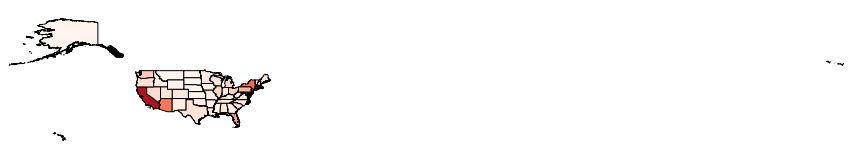

In [104]:
gp = gplt.choropleth(
    dfm3, hue = dfm3['total_pop_mean'], scheme = None,
    cmap='Reds', figsize=(15, 15)
)

Using matplotlib

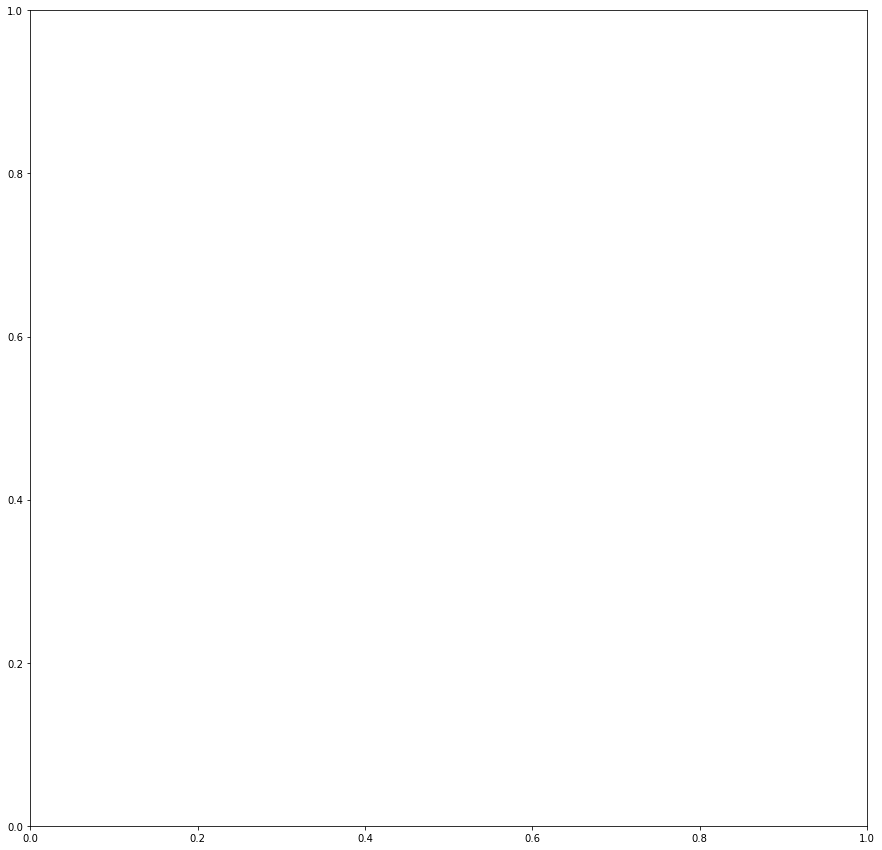

In [105]:
# Create a subplot with `fig` and `ax`.
fig, ax = plt.subplots(1, figsize=(15, 15))

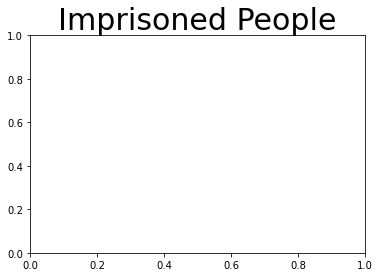

In [106]:
plt.title('Imprisoned People', size=30)
tl = dfm3.plot(column='total_pop_mean',
cmap='Reds',      # Color map for the states                     
             linewidth=0.6,      # Line width for state borders
             ax=ax,              # Plotting the map on `ax`
             edgecolor='black'); # State border colors

In [110]:
c_bar_colors = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=dfm3['total_pop_mean'].min(), vmax=dfm3['total_pop_mean'].max()))

# Plot the colorbar.
color_bar = fig.colorbar(c_bar_colors)

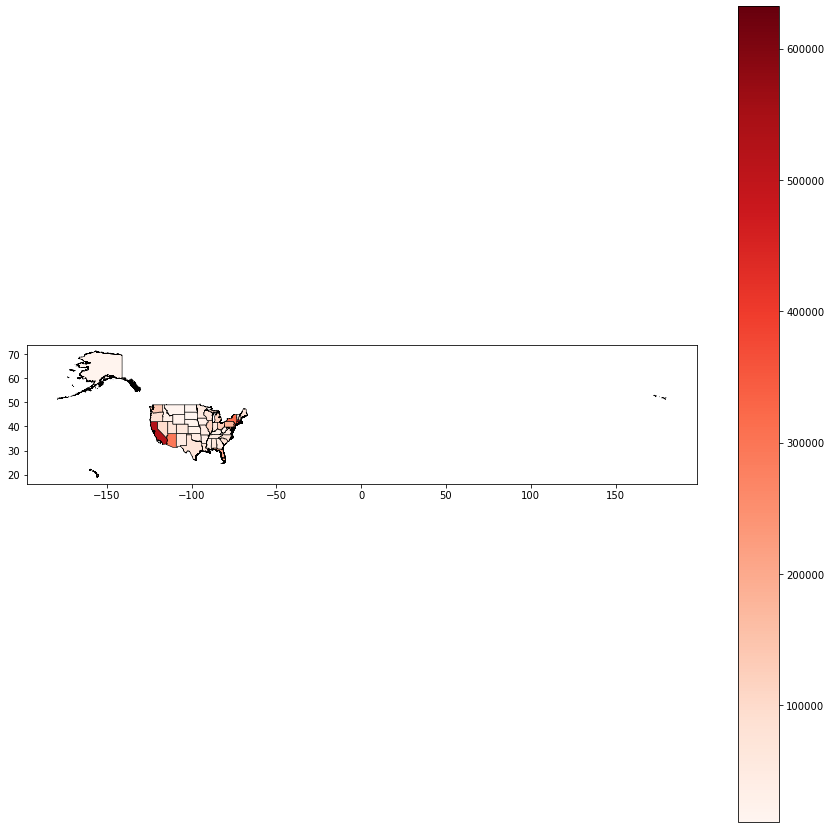

In [111]:
tl.figure

I was expecting the population of California and Florida to be high, but I'm surpirsed at how high the population is in some of the North Eastern Coastal States - Connecticut, Delaware and Maryland. 

Since I'm most interested in the change of incarceration over time and the breakdown of the incarcerated population, a one-variable map didn't shed much light on my hypothesis.